In [74]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob

outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/iREP/'
if os.path.isdir(outdir):
    print(outdir, "already exists.")
else:
    os.mkdir(outdir)
    print(outdir, "is created.")

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/iREP/')    

images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/iRep/'
if os.path.isdir(images):
    print(images, "already exists.")
else:
    os.mkdir(images)
    print(images, "is created.")
    
matplotlib.__version__

/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/iREP/ already exists.
/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/iRep/ already exists.


'3.1.0'

In [55]:
iRep=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/iREP/iRep_out/GoM_irep_results.tsv',
                sep='\t')
iRep=iRep.reset_index()
iRep=iRep.iloc[:78,:]
iRep.dropna(thresh=2, inplace=True)
iRep.columns=['Genome', 20181030, 20190402, 20190709]
iRep=iRep.iloc[1: , :]
iRep['SAG']=iRep['Genome'].str[10:-14]
iRep.drop('Genome', axis=1, inplace=True)
iRep


,20181030,20190402,20190709,SAG
4,NaN,2.641977961874068,NaN,AH-135-C08
6,NaN,1.8043546123094814,NaN,AH-135-C19
13,NaN,2.2390913606477443,2.358130763464432,AH-135-M15
15,NaN,3.927538045056432,3.8324914228693387,AH-141-C18
16,2.022343911936964,NaN,NaN,AH-224-E07
22,1.9481086055805052,NaN,2.105115353911149,AH-269-D22
26,NaN,NaN,1.9165037132634373,AH-273-C13
29,2.054046172172554,NaN,NaN,AH-273-E23
30,1.8482822223212827,NaN,NaN,AH-273-K03
39,2.179725743674107,NaN,NaN,AH-545-L23


In [56]:
# Import Genus for each SAG

cols=['name', 'GTDB_classification']
classify=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_5SAG_genera_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv',
                    usecols=cols)
classify.columns=['SAG', 'GTDB_classification']
classify

iRep=iRep.merge(classify, how='left', on='SAG')
iRep

,20181030,20190402,20190709,SAG,GTDB_classification
0,NaN,2.641977961874068,NaN,AH-135-C08,SGZJ01
1,NaN,1.8043546123094814,NaN,AH-135-C19,Polaribacter
2,NaN,2.2390913606477443,2.358130763464432,AH-135-M15,UBA4441
3,NaN,3.927538045056432,3.8324914228693387,AH-141-C18,IMCC9063
4,2.022343911936964,NaN,NaN,AH-224-E07,Arctic95D-9
5,1.9481086055805052,NaN,2.105115353911149,AH-269-D22,SCGC-AAA160-P02
6,NaN,NaN,1.9165037132634373,AH-273-C13,HTCC2207
7,2.054046172172554,NaN,NaN,AH-273-E23,UBA9320
8,1.8482822223212827,NaN,NaN,AH-273-K03,MGIIb-O2
9,2.179725743674107,NaN,NaN,AH-545-L23,NaN


In [57]:
#I think that I need to pivot it first so that it is SAG/classificaiton as the index and add the date in a fourth column
df1810=iRep[[20181030, 'SAG', 'GTDB_classification']].copy()
df1810.columns=['iRep','SAG', 'GTDB_classification']
df1810['date']=20181030
df1810.dropna(inplace=True)
df1810

df1904=iRep[[20190402, 'SAG', 'GTDB_classification']].copy()
df1904.columns=['iRep','SAG', 'GTDB_classification']
df1904['date']=20190402
df1904.dropna(inplace=True)
df1904

df1907=iRep[[20190709, 'SAG', 'GTDB_classification']].copy()
df1907.columns=['iRep','SAG', 'GTDB_classification']
df1907['date']=20190709
df1907.dropna(inplace=True)
df1907

iRep=pd.concat([df1810,df1904,df1907], ignore_index=True)
iRep

,iRep,SAG,GTDB_classification,date
0,2.022343911936964,AH-224-E07,Arctic95D-9,20181030
1,1.9481086055805052,AH-269-D22,SCGC-AAA160-P02,20181030
2,2.054046172172554,AH-273-E23,UBA9320,20181030
3,1.8482822223212827,AH-273-K03,MGIIb-O2,20181030
4,2.896682102740315,AH-545-P14,UBA868,20181030
5,2.460319122179138,AH-548-P01,SW10,20181030
6,2.4174886913460294,AH-700-J10,Hellea,20181030
7,2.641977961874068,AH-135-C08,SGZJ01,20190402
8,1.8043546123094814,AH-135-C19,Polaribacter,20190402
9,2.2390913606477443,AH-135-M15,UBA4441,20190402


In [58]:
cols=['GTDB_genus', 'Average_doubling_time']
replication=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/Supplemental_table_genus_statistics.csv',
                       usecols=cols)
replication.columns=['GTDB_classification', 'gRodon_Average_doubling_time']

iRep=iRep.merge(replication, how='left', on='GTDB_classification')
iRep

,iRep,SAG,GTDB_classification,date,gRodon_Average_doubling_time
0,2.022343911936964,AH-224-E07,Arctic95D-9,20181030,5.156859
1,1.9481086055805052,AH-269-D22,SCGC-AAA160-P02,20181030,4.910311
2,2.054046172172554,AH-273-E23,UBA9320,20181030,4.710426
3,1.8482822223212827,AH-273-K03,MGIIb-O2,20181030,8.065256
4,2.896682102740315,AH-545-P14,UBA868,20181030,13.547811
5,2.460319122179138,AH-548-P01,SW10,20181030,4.386646
6,2.4174886913460294,AH-700-J10,Hellea,20181030,9.196135
7,2.641977961874068,AH-135-C08,SGZJ01,20190402,6.141803
8,1.8043546123094814,AH-135-C19,Polaribacter,20190402,4.430342
9,2.2390913606477443,AH-135-M15,UBA4441,20190402,5.232848


In [59]:
# import and load the average O2 conusption for each genus for each day
cols=['date', 'genus', 'avg_fmol_O2_consumed']
O2=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/avg_O2_consumption_and_abundance_per_day_melt.csv',
               usecols=cols)
O2.columns=['GTDB_classification', 'date', 'avg_fmol_O2_consumed']
iRep=iRep.merge(O2, how='left', on=['GTDB_classification', 'date'])
iRep.to_csv(outdir+'iRep_doubling_summary.csv')

iRep

,iRep,SAG,GTDB_classification,date,gRodon_Average_doubling_time,avg_fmol_O2_consumed
0,2.022343911936964,AH-224-E07,Arctic95D-9,20181030,5.156859,0.002050
1,1.9481086055805052,AH-269-D22,SCGC-AAA160-P02,20181030,4.910311,0.011975
2,2.054046172172554,AH-273-E23,UBA9320,20181030,4.710426,0.002050
3,1.8482822223212827,AH-273-K03,MGIIb-O2,20181030,8.065256,0.002744
4,2.896682102740315,AH-545-P14,UBA868,20181030,13.547811,0.002050
5,2.460319122179138,AH-548-P01,SW10,20181030,4.386646,0.002050
6,2.4174886913460294,AH-700-J10,Hellea,20181030,9.196135,0.004943
7,2.641977961874068,AH-135-C08,SGZJ01,20190402,6.141803,0.002101
8,1.8043546123094814,AH-135-C19,Polaribacter,20190402,4.430342,0.025400
9,2.2390913606477443,AH-135-M15,UBA4441,20190402,5.232848,0.002101


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


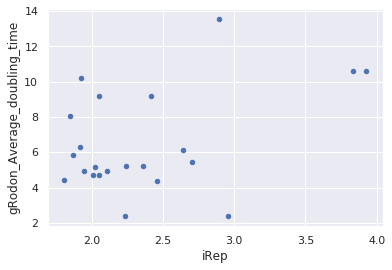

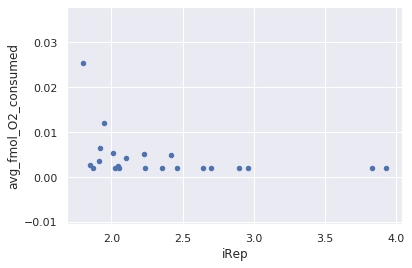

In [68]:
iRep['iRep']=iRep['iRep'].astype('float')
iRep.plot.scatter(x='iRep', y='gRodon_Average_doubling_time')

iRep.plot.scatter(x='iRep', y='avg_fmol_O2_consumed')

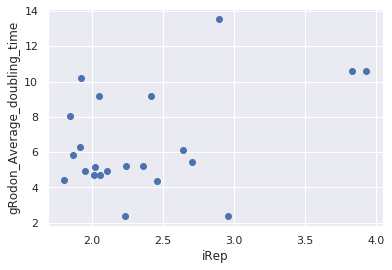

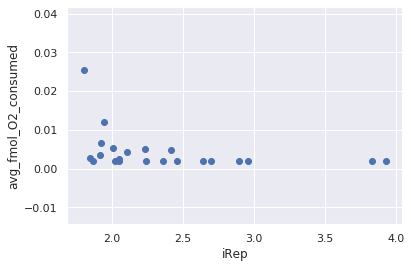

In [76]:
plt.scatter(iRep.iRep, iRep.gRodon_Average_doubling_time)
plt.xlabel('iRep')
plt.ylabel('gRodon_Average_doubling_time')
plt.savefig(images+'iRep_vs_gRodon.pdf')
plt.show()

plt.scatter(iRep.iRep, iRep.avg_fmol_O2_consumed)
plt.xlabel('iRep')
plt.ylabel('avg_fmol_O2_consumed')
plt.savefig(images+'iRep_vs_avg_fmol_O2_consumed.pdf')
plt.show()
